In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

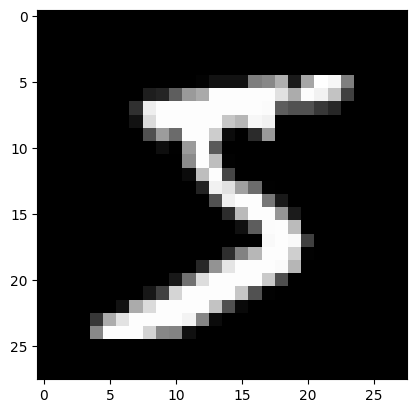

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0

In [12]:
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)

In [17]:
y_test_onehot = utils.to_categorical(y_test,10)

In [18]:
type(y_train_onehot)

numpy.ndarray

In [19]:
y_train_onehot.shape

(60000, 10)

In [20]:
single_image = X_train[500]

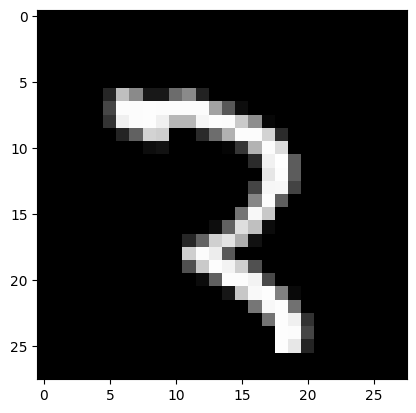

In [ ]:
plt.imshow(single_image,cmap='gray')

In [21]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)

In [23]:
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [24]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=35,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(35,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 35)        350       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 35)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5915)              0         
                                                                 
 dense (Dense)               (None, 35)                207060    
                                                                 
 dense_1 (Dense)             (None, 64)                2304      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [27]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 0.2355 - accuracy: 0.9306 - val_loss: 0.1011 - val_accuracy: 0.9673
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0770 - accuracy: 0.9768 - val_loss: 0.0616 - val_accuracy: 0.9796
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss: 0.0557 - val_accuracy: 0.9802
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.0472 - val_accuracy: 0.9842
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0528 - val_accuracy: 0.9823


In [28]:
metrics = pd.DataFrame(model.history.history)


In [29]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.235547,0.930600,0.101067,0.9673
1,0.077018,0.976850,0.061586,0.9796
2,0.053246,0.983633,0.055718,0.9802
3,0.040979,0.987700,0.047193,0.9842
4,0.033717,0.989450,0.052752,0.9823


Rakshitha Devi J  212221230082


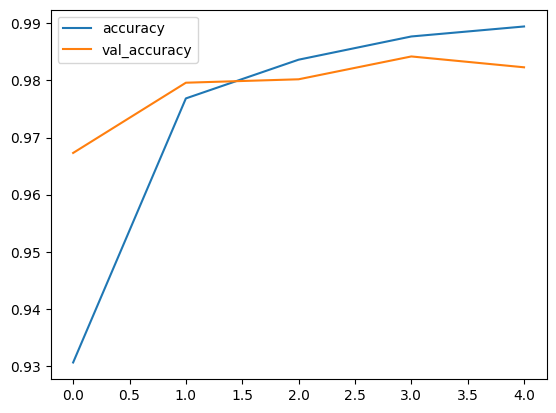

In [45]:
metrics[['accuracy','val_accuracy']].plot()
print("Rakshitha Devi J  212221230082")

Rakshitha Devi J  212221230082


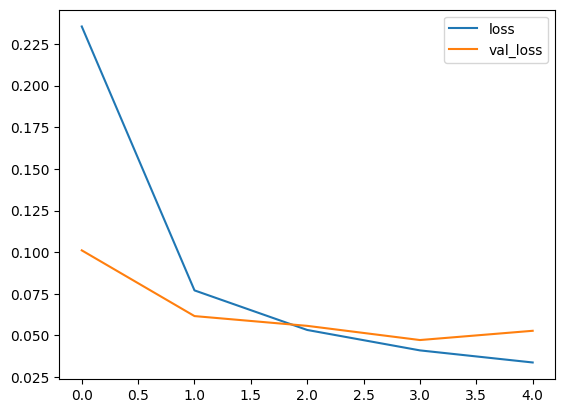

In [46]:
metrics[['loss','val_loss']].plot()
print("Rakshitha Devi J  212221230082")

In [32]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 7ms/step


In [47]:
print(confusion_matrix(y_test,x_test_predictions))
print("Rakshitha devi J","212221230082")

[[ 976    0    0    1    0    0    3    0    0    0]
 [   0 1133    0    1    0    0    1    0    0    0]
 [   4    8 1001    5    1    0    2    8    3    0]
 [   0    0    0 1002    0    6    0    1    1    0]
 [   4    1    0    0  961    0    3    2    1   10]
 [   2    0    0    7    0  878    5    0    0    0]
 [   9    3    0    0    2    1  942    0    1    0]
 [   1    5    6    2    0    0    0 1013    1    0]
 [   7    0    2    6    0    3    2    3  947    4]
 [   4    6    0    3    5    6    0   10    5  970]]
Rakshitha devi J 212221230082


In [34]:
print("Rakshitha devi J","212221230082")
print(classification_report(y_test,x_test_predictions))

Rakshitha devi J 212221230082
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [48]:
img = image.load_img('/content/hw no 1.png')


In [49]:
type(img)

PIL.Image.Image

In [50]:
img = image.load_img('//content/hw no 1.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [51]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 23ms/step


In [53]:

print(x_single_prediction)

[6]


Rakshitha devi J 212221230082


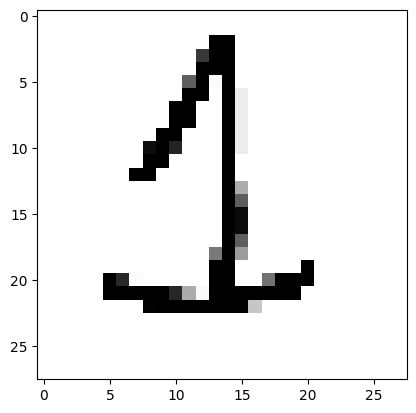

In [62]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("Rakshitha devi J","212221230082")

Rakshitha devi J 212221230082


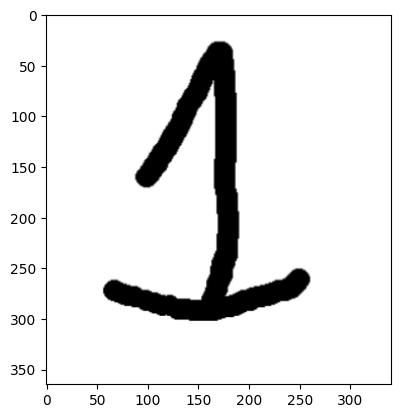

In [63]:
img1 = image.load_img('/content/hw no 1.png')
plt.imshow(img1)
print("Rakshitha devi J","212221230082")

In [56]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [57]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 17ms/step


In [61]:
print("Rakshitha Devi J","212221230082")
print(x_single_prediction)

Rakshitha Devi J 212221230082
[1]
